# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('C:/Users/Dell/Desktop/Andre Aula/Aula de CDD/Exercicios/base_modulo07.csv')
df.head(5)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,3,1,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,6,0,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [4]:
df.dtypes

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64


In [6]:
y = df.mau
X = df.drop('mau',axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [8]:
clf = tree.DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

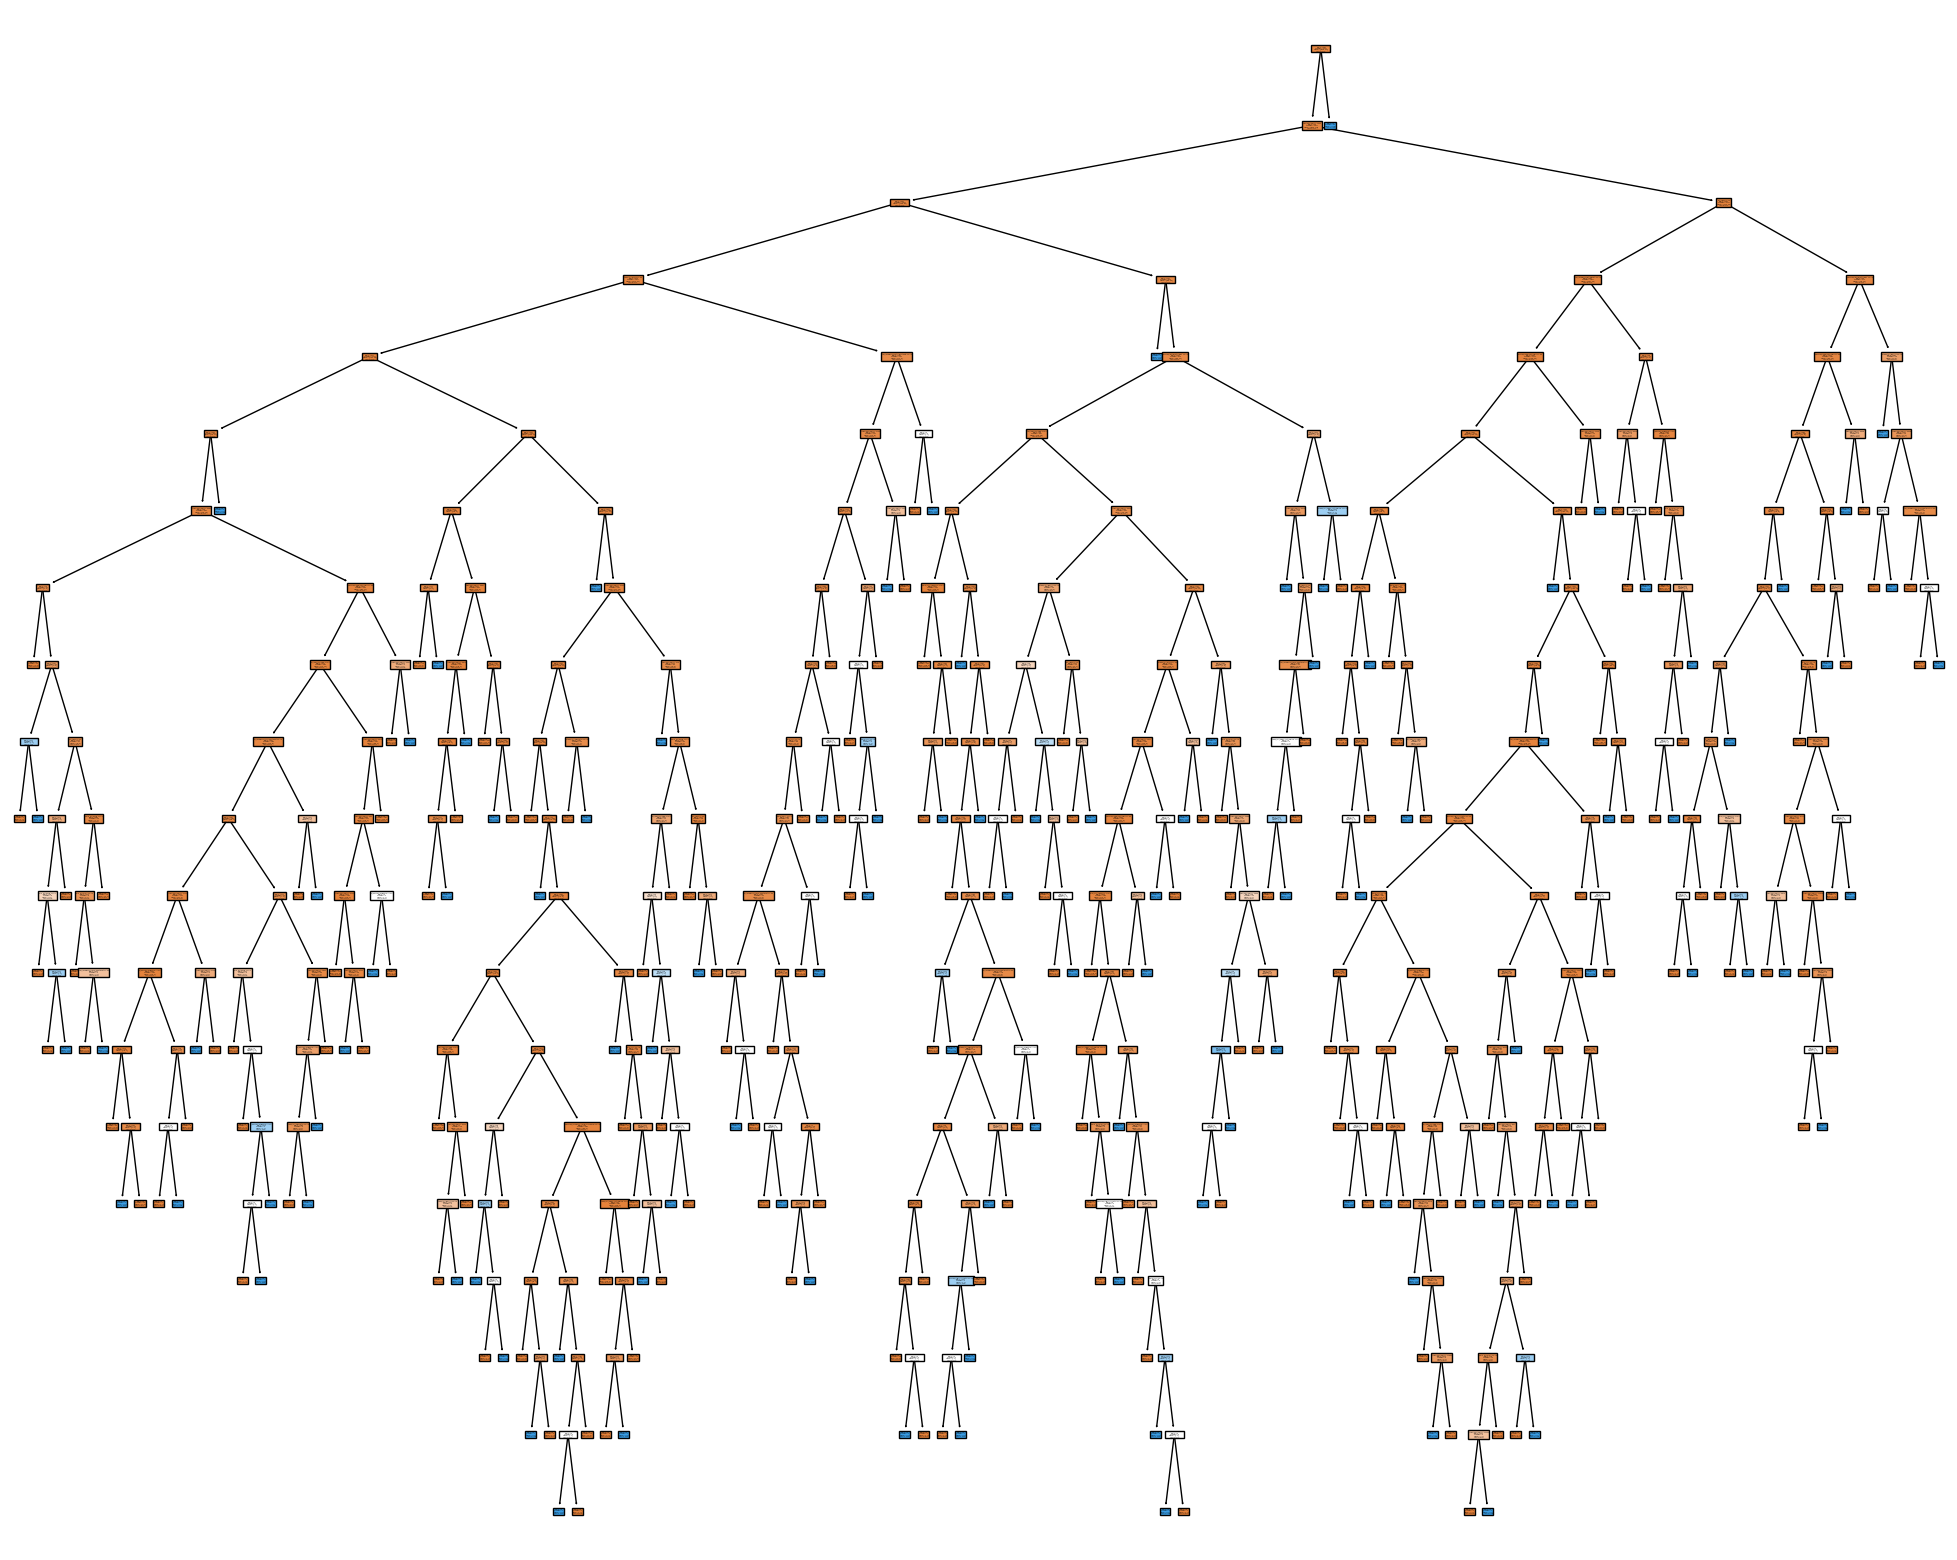

In [15]:
plt.figure(figsize=(25, 20))
tree.plot_tree(clf,
          filled=True,
          class_names=['False', 'True'],
          feature_names=X.columns);

In [11]:
pred = clf.predict(X_train)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


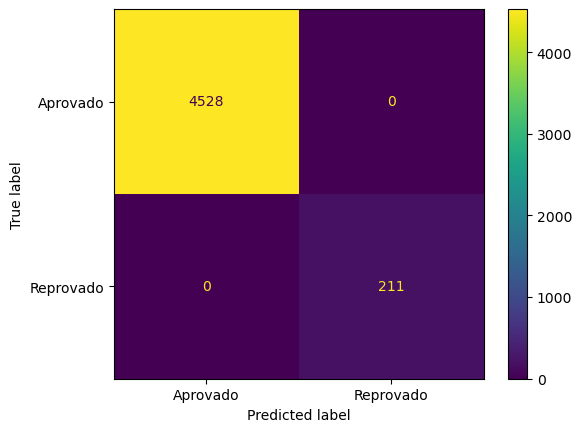

In [16]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado'])

In [17]:
accuracy_score(y_train, pred)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf.fit(X_train,y_train)

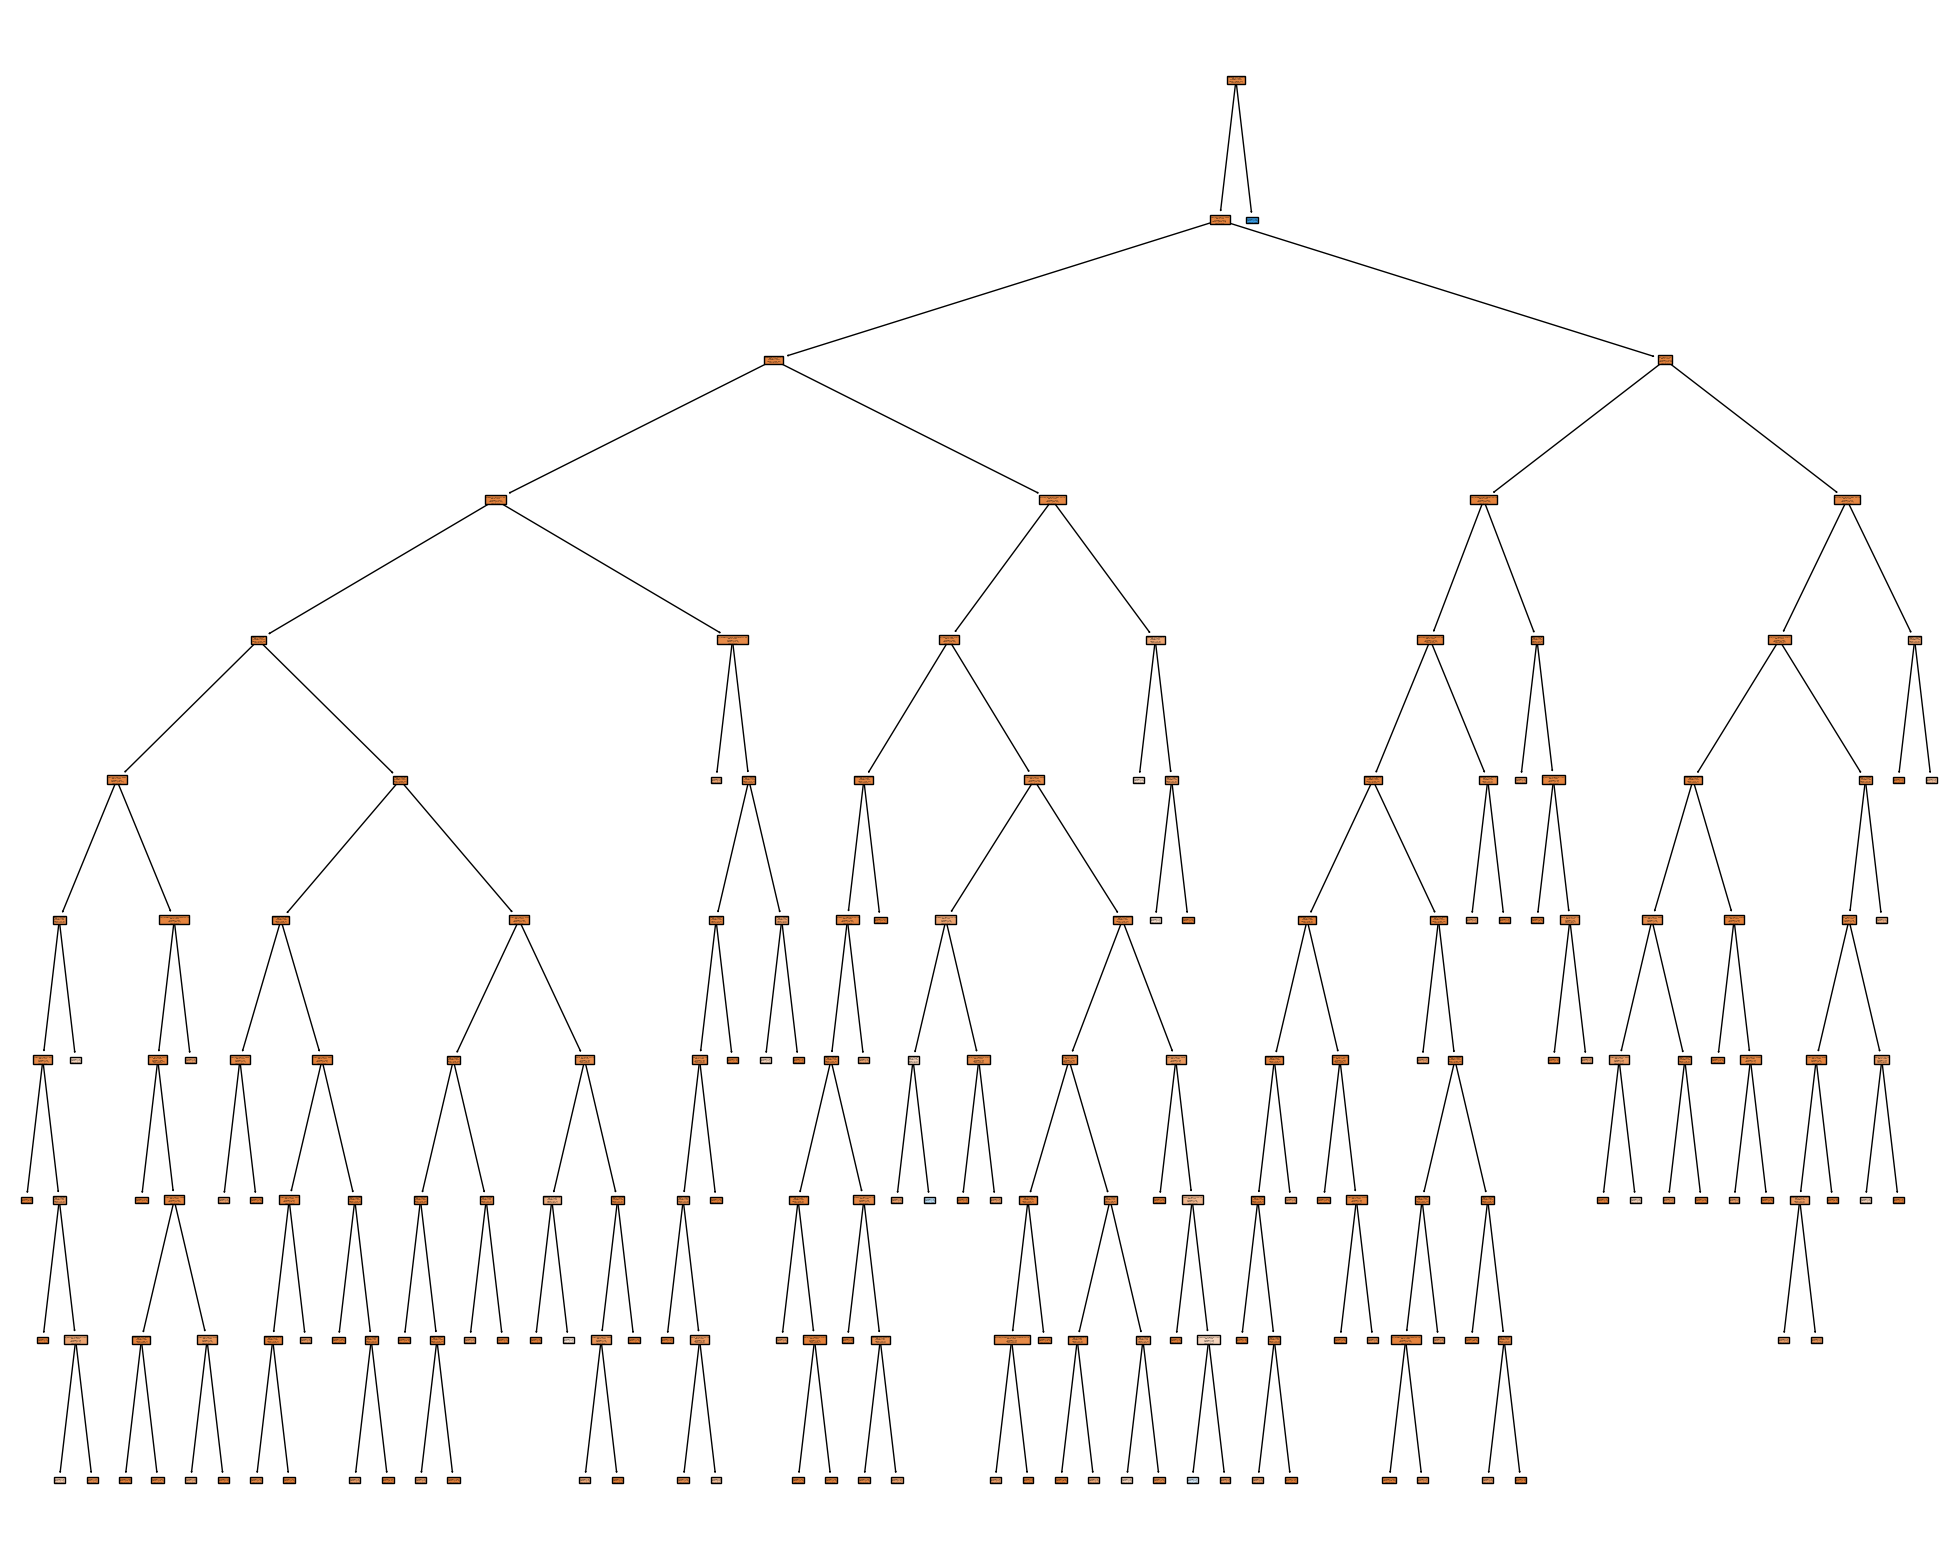

In [19]:
plt.figure(figsize=(25, 20))
tree.plot_tree(clf2,
          filled=True,
          class_names=['False', 'True'],
          feature_names=X.columns);

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


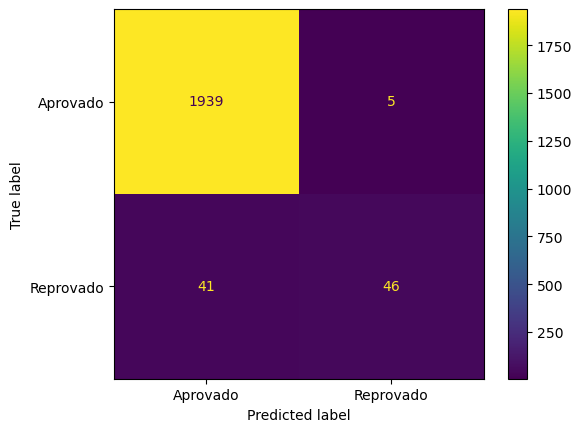

In [20]:
pred_2 = clf2.predict(X_test)
plot_confusion_matrix(clf2, X_test, y_test, display_labels=['Aprovado', 'Reprovado'])

In [21]:
accuracy_score(y_test, pred_2)

0.9773510585918267